<a href="https://colab.research.google.com/github/shaluduggal/Python/blob/python/breast_tumor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install visualkeras
!pip install tensorflow
!pip install keras-tuner

In [5]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from kerastuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.layers import LeakyReLU
# CNN Architecture Visualization Library
from keras.layers import Flatten,Dense,Dropout
from keras import optimizers
from keras.layers import BatchNormalization


ModuleNotFoundError: No module named 'kerastuner'

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from PIL import Image ,ImageOps
      # pip install pilow if not works well


In [10]:
#import sys
#!{sys.executable} -m pip install opencv-python

In [11]:
import cv2
from PIL import Image

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from pathlib import Path
benign1 =[]
frames= Path('/content/drive/MyDrive/dataset/benign')
for file in frames.glob('*.png'):
    img=Image.open(file)
    img=ImageOps.grayscale(img)    #convert to grey scale
    img=img.resize((224,224))
    #we can use img.thumnail () to resize so that aspect ratio is maintained
  #  img.save('D:/research_p/dataset/benign'+file+".jpg")
    benign1.append(np.array(img))
b =len(benign1)
malignant1 =[]
frames= Path('/content/drive/MyDrive/dataset/malignant')
for file in frames.glob('*.png'):
    img=Image.open(file)
    img=ImageOps.grayscale(img)    #convert to grey scale
    img=img.resize((224,224))
   # img.save('D:/research_p/dataset/malignant')
    malignant1.append(np.array(img))
m =len(malignant1)
normal1 =[]
frames= Path('/content/drive/MyDrive/dataset/normal')
for file in frames.glob('*.png'):
    img=Image.open(file)
    img=ImageOps.grayscale(img)     #convert to grey scale
    img=img.resize((224,224))
    #img.save('D:/research_p/dataset/normal')
    normal1.append(np.array(img))
n =len(normal1)
print(n)

133


In [14]:
print(b,m,n)

437 210 133


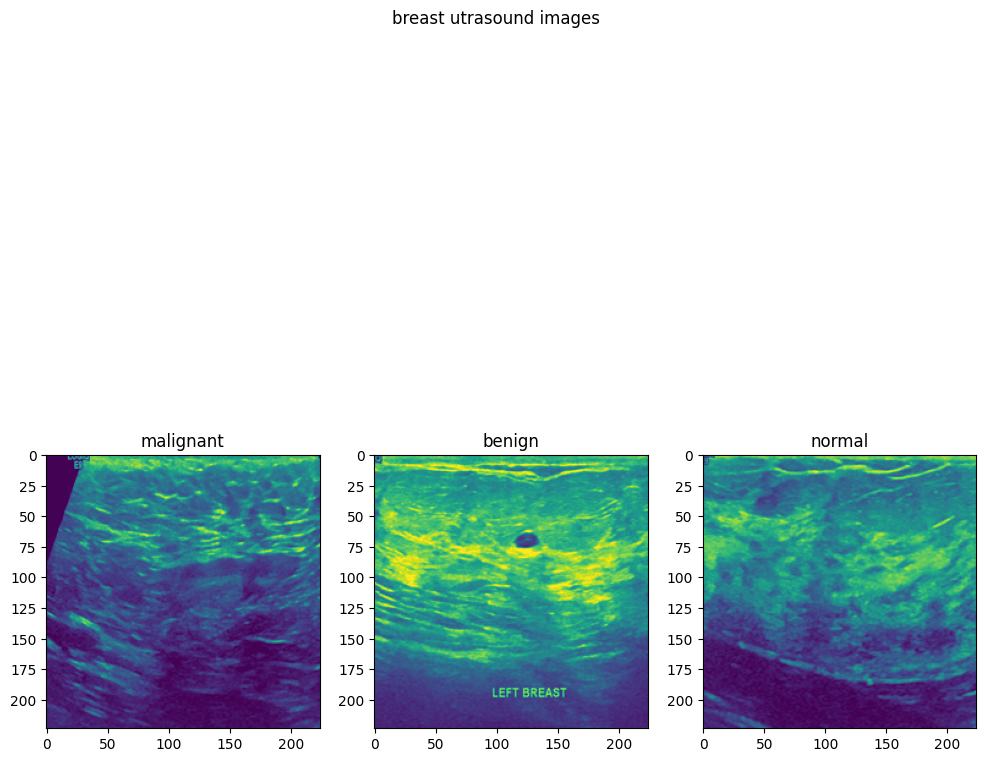

In [15]:
fig,axis =plt.subplots(1,3,figsize=(12,12))
axis[0].imshow(malignant1[0])
axis[1].imshow(benign1[0])
axis[2].imshow(normal1[0])
axis[0].set_title("malignant")
#axis[0].axis("off")  #axis turned off
axis[1].set_title("benign")
axis[2].set_title("normal")
fig.suptitle("breast utrasound images")
plt.show()


In [16]:
#Features combination
#combining data into images
images =[ ]
images.extend(malignant1)
images.extend(benign1)
images.extend(normal1)
len(images)


780

In [17]:
#adding labels
labels=[ ]
m=[1]*m
b=[2]*b
n=[0]*n

labels.extend(m)
labels.extend(b)
labels.extend(n)
len(labels)

780

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(images,labels,test_size=0.2,random_state=12)
print(len(x_train),len(x_test))

624 156


In [29]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(x_train.shape, x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(624, 224, 224) (156, 224, 224)


In [20]:
#x_test_flattened =x_test.reshape(x_test.shape[0],-1)
#x_train_flattened =x_train.reshape(x_train.shape[0],-1)
#print(x_train_flattened.shape, x_test_flattened.shape)

In [21]:
#x_train =x_train.reshape(624,224,224,1)
#x_test =x_test.reshape(156,224,224,1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras import layers
import tensorflow as tf
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("output_report.png")

since val_accuracy(validation test) is 75 percent so model is overfitted
so reduce network complexity
dropout improve at last layers
regularise
use batch norm
increasing training dataset



# Hyperparameter tuning

In [24]:
# Building a checkpoint, which will try to save the model which performed the best on the validation dataset
check_point = ModelCheckpoint("best_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True)

In [25]:
import keras_tuner as kt
import keras

In [ ]:

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D (
           filters=hp.Int('conv_filters_layer1',min_value=32,max_value=128,step=16),
           kernel_size=hp.Choice('conv_kernel_layer1',values=[3,4,5]),
           activation=hp.Choice("activation_layer1", ["relu", "tanh"]),
           input_shape=(224,224,1)

))
    model.add(BatchNormalization())
    model.add(keras.layers.Conv2D (
           filters=hp.Int('conv_filters_layer2',min_value=32,max_value=128,step=16),
           kernel_size=hp.Choice('conv_kernel_layer2',values=[3,4,5]),
           activation=hp.Choice("activation_layer2", ["relu", "tanh"]),
           input_shape=(224,224,1)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(
         units=hp.Int('conv_dense_layer3',min_value=32,max_value=128,step=16),
         activation=hp.Choice("activation_layer1", ["relu", "tanh"]),
        ))
    model.add(Dropout(0.1))
    model.add(Dense(
         units=hp.Int('conv_dense_layer4',min_value=32,max_value=128,step=16),
         activation=hp.Choice("activation_layer1", ["relu", "tanh"]),
        ))
    model.add(Dropout(0.1))
    model.add(Dense(3,activation='softmax'))
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    opt=Adam(learning_rate=lr,beta_1=0.9,beta_2=0.999,epsilon=1e-08)

    model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["acccuracy"])

    return model


build_model(kt.HyperParameters())

In [ ]:

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
  #  directory='output',
   # project_name="breast_tumor_report"
)
tuner.search_space_summary()



In [ ]:
#tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))
tuner.search(x_train,y_train,validation_split=0.1)
tuner.search(x_train,y_train,epochs=3,validation_split=0.1,Callback=[check_point])
#tuner.search()

In [ ]:
tuner.search()

In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

In [ ]:
tuner.results_summary()


In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])
model.fit(x_train, y_train, epochs=3)


In [ ]:
# CNN Architecture Visualization Library
#! pip install visualkeras

In [ ]:
# Based on the best validation accuracy, we are taking that model for prediction on X_test #

model4=tuner_search.get_best_models(num_models=1)[0]
model4.summary()

# Below are the model parameters of the model which performed the best on validation set #

In [ ]:
model4.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20)

In [ ]:
visualkeras.layered_view(model4)

In [ ]:
score = model4.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])